In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Class: Top Gear
Sample Image Paths:
['/content/drive/MyDrive/Neural Network And Deep Learning/Data/thumbnails/images/Top Gear/JhdRv3KNHXA.jpg', '/content/drive/MyDrive/Neural Network And Deep Learning/Data/thumbnails/images/Top Gear/DrUVMdkb4_k.jpg', '/content/drive/MyDrive/Neural Network And Deep Learning/Data/thumbnails/images/Top Gear/7NZ9X9A2efA.jpg']


Class: Throttle House
Sample Image Paths:
['/content/drive/MyDrive/Neural Network And Deep Learning/Data/thumbnails/images/Throttle House/QItug8-BuSc.jpg', '/content/drive/MyDrive/Neural Network And Deep Learning/Data/thumbnails/images/Throttle House/-gZLTLmZBGM.jpg', '/content/drive/MyDrive/Neural Network And Deep Learning/Data/thumbnails/images/Throttle House/CFUu71dMpqA.jpg']


Class: Veritasium
Sample Image Paths:
['/content/drive/MyDrive/Neural Network And Deep Learning/Data/thumbnails/images/Veritasium/BZbChKzedEk.jpg', '/content/drive/MyDrive/Neural Network And Deep Learning/Data/thumbnails/images/Veritasium/GcdB5bFwio4.jpg',

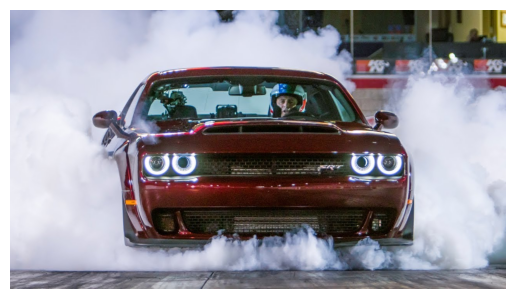

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
# Mount Google Drive (optional, if your data is stored in Google Drive)
# from google.colab import drive
# drive.mount('/content/drive')

data_dir = r'/content/drive/MyDrive/Neural Network And Deep Learning/Data/thumbnails/images'

# List all files and directories in the specified path
# images = os.listdir(data_dir)

# Get a list of all subdirectories (each representing a class or category)
class_folders = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

# Dictionary to store image paths for each class
image_paths = {class_folder: [] for class_folder in class_folders}

# Loop through each class folder and get image paths
for class_folder in class_folders:
    class_folder_path = os.path.join(data_dir, class_folder)
    image_paths[class_folder] = [os.path.join(class_folder_path, image) for image in os.listdir(class_folder_path)]

# Display the first few image paths for each class
for class_folder, paths in image_paths.items():
    print(f"Class: {class_folder}")
    print("Sample Image Paths:")
    print(paths[:3])  # Displaying the first three image paths as an example
    print("\n")

# Example: Load and display an image from one class


# Select an image file from the first class
sample_image_path = image_paths[class_folders[0]][0]

# Load the image using OpenCV
image = cv2.imread(sample_image_path)

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [3]:
img = cv2.imread(os.path.join(data_dir, class_folder,'CfW845LNObM.jpg'))


In [4]:
class_folder

'3Blue1Brown'

In [5]:
img.shape

(720, 1280, 3)

In [6]:
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 2303 files belonging to 91 classes.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

In [9]:
len(batch)

2

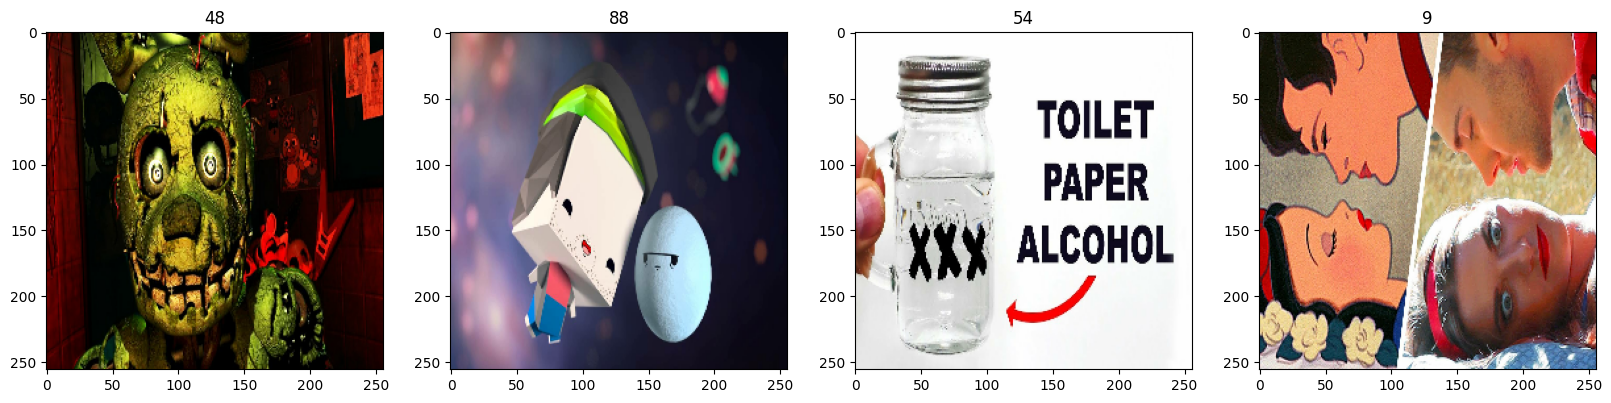

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [11]:
import tensorflow as tf
from math import ceil
import matplotlib.pyplot as plt

# Assuming you have loaded the data using image_dataset_from_directory
# data = tf.keras.utils.image_dataset_from_directory(data_dir)

data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

# Create a dictionary to map class indices to batch numbers
class_batch_mapping = {}
for i, class_label in enumerate(batch[1]):
    class_batch_mapping.setdefault(class_label, []).append(i)

# Calculate the number of rows needed based on the number of classes
num_rows = ceil(len(class_batch_mapping) / 4)

# Visualize all 91 classes
fig, axs = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))

for class_label, indices in class_batch_mapping.items():
    for idx in range(4):
        if idx < len(indices):
            img = batch[0][indices[idx]]
            axs[class_label % num_rows, idx].imshow(img.astype(int))
            axs[class_label % num_rows, idx].title.set_text(f'Class: {class_label}, Batch: {indices[idx]}')

plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [12]:
# Assuming you have loaded the data using image_dataset_from_directory
# data = tf.keras.utils.image_dataset_from_directory(data_dir)

# Get the class names from the dataset
class_names = data.class_names

# Create a mapping between class names and indices
class_indices = {class_name: idx for idx, class_name in enumerate(class_names)}

# Print the mapping
print("Class Indices:", class_indices)


Class Indices: {'3Blue1Brown': 0, 'A&E': 1, 'About To Eat': 2, 'Abroad in Japan': 3, 'Austin Evans': 4, 'BBC News': 5, 'Barely Sociable': 6, 'Bon App├⌐tit': 7, 'Brooklyn Nine-Nine': 8, 'BuzzFeedVideo': 9, 'CDawgVA': 10, 'CNET': 11, 'Captain Disillusion': 12, 'Car Throttle': 13, 'ChrisFix': 14, 'Coder Coder': 15, 'DRIVETRIBE': 16, 'Doctor Who': 17, 'Donut Media': 18, 'Dr. Becky': 19, 'DramaAlert': 20, 'Drew Gooden': 21, 'Eater': 22, 'ElectroBOOM': 23, 'EpicNameBro': 24, 'Epicurious': 25, 'Fireship': 26, 'First We Feast': 27, 'FoodTribe': 28, 'Gordon Ramsay': 29, 'Hardware Canucks': 30, "Hell's Kitchen": 31, 'Incognito Mode': 32, 'Insider News': 33, 'Internet Historian': 34, 'JCS - Criminal Psychology': 35, 'JRE Clips': 36, 'Joma Tech': 37, 'Joma in NYC': 38, 'Key & Peele': 39, 'Kurzgesagt ΓÇô In a Nutshell': 40, 'LEMMiNO': 41, 'LGR': 42, "Let's Game It Out": 43, 'LevelCapGaming': 44, 'Lex Clips': 45, 'Linus Tech Tips': 46, 'Mark Rober': 47, 'Markiplier': 48, 'Marques Brownlee': 49, 'M

In [13]:
batch[0][0]

array([[[243.     , 246.     , 251.     ],
        [243.     , 246.     , 251.     ],
        [243.     , 246.     , 251.     ],
        ...,
        [215.     , 228.     , 185.     ],
        [212.     , 227.     , 188.     ],
        [213.     , 227.     , 191.     ]],

       [[243.     , 246.     , 251.     ],
        [243.     , 246.     , 251.     ],
        [243.     , 246.     , 251.     ],
        ...,
        [214.     , 227.     , 183.     ],
        [211.28125, 226.28125, 185.84375],
        [212.28125, 226.28125, 190.28125]],

       [[244.     , 247.     , 252.     ],
        [244.     , 247.     , 252.     ],
        [243.     , 246.     , 251.     ],
        ...,
        [213.46875, 227.     , 179.40625],
        [211.     , 226.     , 183.9375 ],
        [212.     , 226.     , 190.     ]],

       ...,

       [[254.     , 254.     , 254.     ],
        [254.     , 254.     , 254.     ],
        [254.     , 254.     , 254.     ],
        ...,
        [224.     , 227.  

In [14]:
import tensorflow as tf

# Assuming you have loaded the data using image_dataset_from_directory
# data = tf.keras.utils.image_dataset_from_directory(data_dir)

# Get the first batch
batch = next(iter(data))

# Extract the first image
first_image = batch[0][0]

# Get the height and width of the image
img_height, img_width = first_image.shape[0], first_image.shape[1]

print("Image Height:", img_height)
print("Image Width:", img_width)


Image Height: 256
Image Width: 256


In [15]:
validation_dataset_path

NameError: ignored

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import os

# Define the paths
train_dataset_path = '/content/drive/MyDrive/Neural Network And Deep Learning/Data/thumbnails/images'
validation_dataset_path = '/content/drive/MyDrive/Neural Network And Deep Learning/Data/validation_thumbnails'

# Set the image dimensions
img_height, img_width = 224, 224

# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create the training generator
train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',  # Assuming you have multiple classes
)

# Create an ImageDataGenerator for data augmentation in the validation set
val_datagen = ImageDataGenerator(rescale=1./255)

# Create the validation generator
val_generator = val_datagen.flow_from_directory(
    validation_dataset_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'  # Assuming you have multiple classes
)

# Count the number of classes in the training set
num_classes = len(train_generator.class_indices)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=30, validation_data=val_generator)


Found 2303 images belonging to 91 classes.
Found 0 images belonging to 0 classes.
Epoch 1/30
30/72 [===========>..................] - ETA: 4:31 - loss: 4.6804 - accuracy: 0.0115

KeyboardInterrupt: ignored

In [ ]:
train_size

57

In [ ]:
train_dataset

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
val_dataset

<_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>